C:\Users\bhosa\AppData\Local\Temp\ipykernel_17064\3356667553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rainfall_by_crop.index, y=average_rainfall_by_crop.values, palette='viridis')


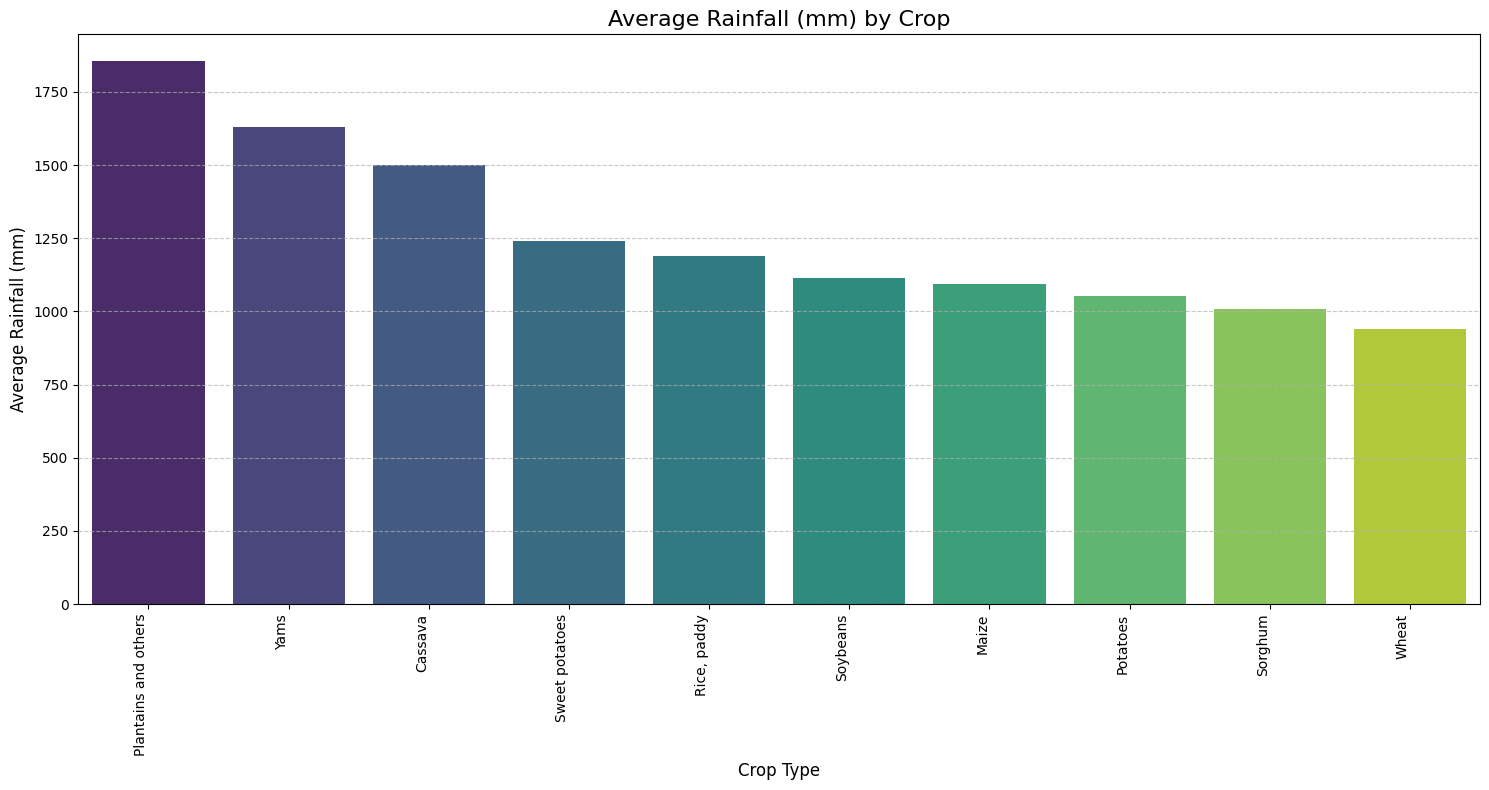

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('yield_df.csv')

# --- Bar Chart: Average Rainfall (mm) by Crop ---
# This chart compares the average rainfall across different crop types.
plt.figure(figsize=(15, 8))
average_rainfall_by_crop = df.groupby('crop')['rainfall_mm'].mean().sort_values(ascending=False)
sns.barplot(x=average_rainfall_by_crop.index, y=average_rainfall_by_crop.values, palette='viridis')
plt.title('Average Rainfall (mm) by Crop', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



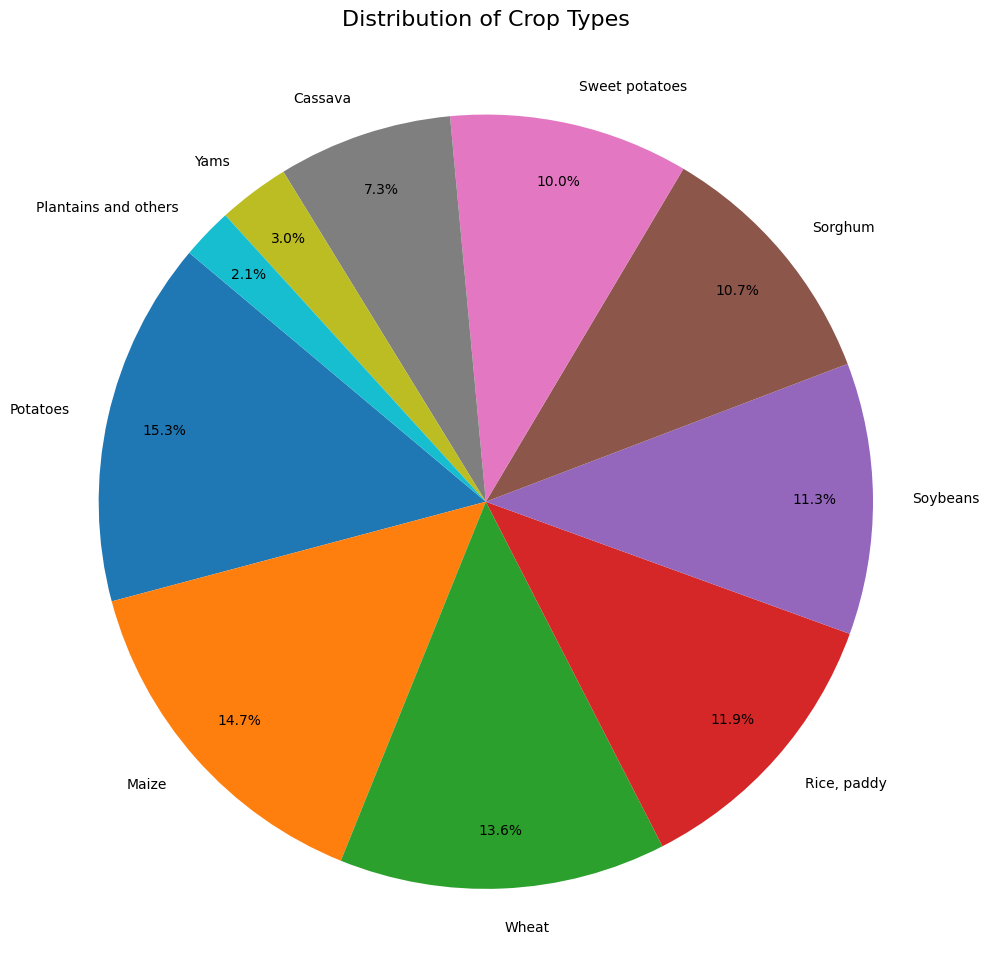

In [2]:
# --- Pie Chart: Distribution of Top 10 Crop Types ---
# This chart shows the proportion of different crop types in your dataset.
plt.figure(figsize=(10, 10))
crop_counts = df['crop'].value_counts()
# Select top 10 crops, and group the rest into 'Others'
top_10_crops = crop_counts.head(10)
other_crops_count = crop_counts.iloc[10:].sum()
if other_crops_count > 0:
    plot_data = pd.concat([top_10_crops, pd.Series({'Others': other_crops_count})])
else:
    plot_data = top_10_crops

plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Crop Types', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



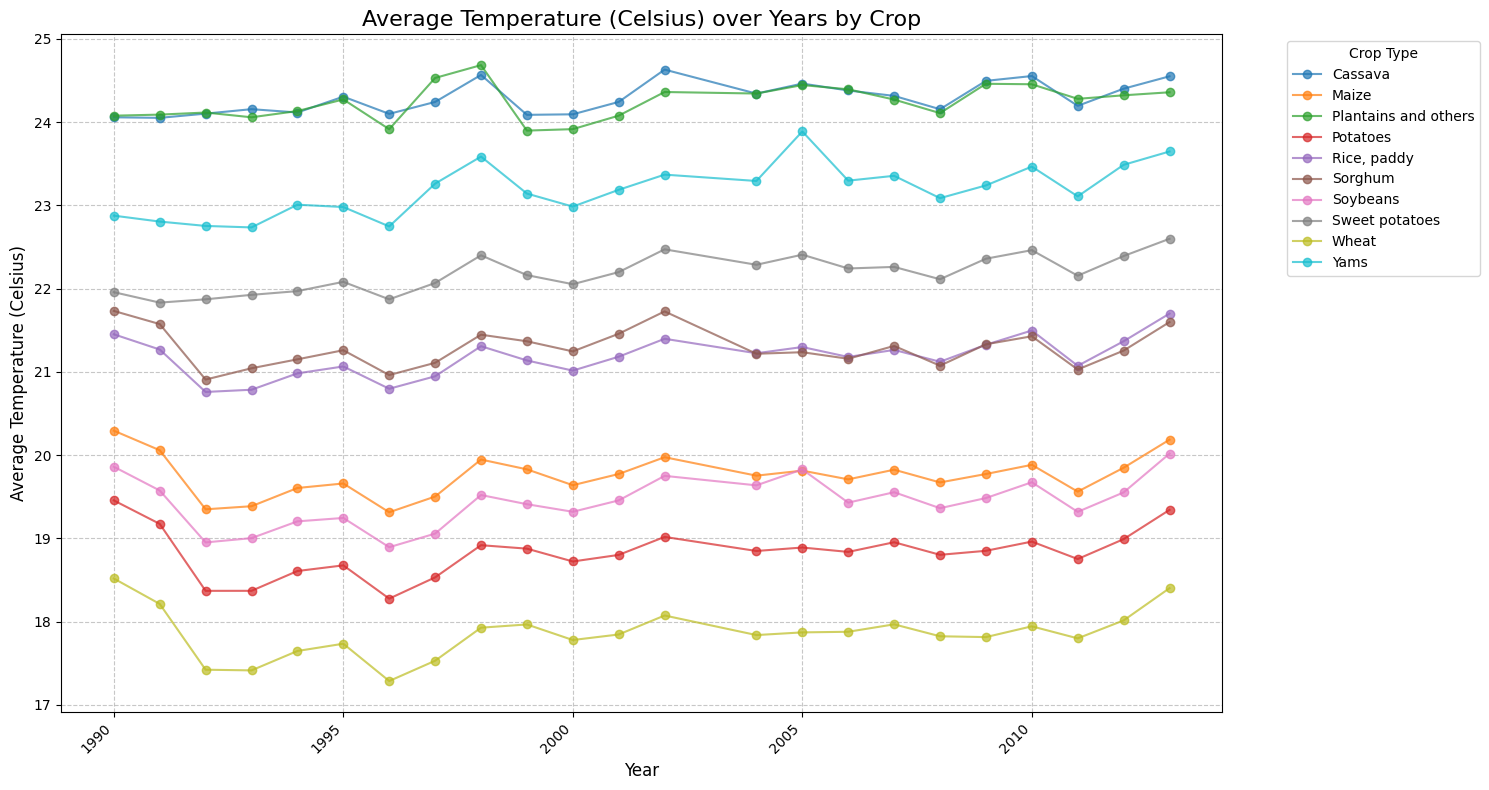

In [3]:
# --- Line Chart: Average Temperature (Celsius) over Years by Crop ---
# This chart illustrates how the average temperature has changed over the years for each specific crop type.
plt.figure(figsize=(15, 8))
avg_temp_by_year_crop = df.groupby(['year', 'crop'])['avg_temp_celsius'].mean().reset_index()

for crop_type in avg_temp_by_year_crop['crop'].unique():
    crop_data = avg_temp_by_year_crop[avg_temp_by_year_crop['crop'] == crop_type]
    plt.plot(crop_data['year'], crop_data['avg_temp_celsius'], marker='o', linestyle='-', label=crop_type, alpha=0.7)

plt.title('Average Temperature (Celsius) over Years by Crop', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (Celsius)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



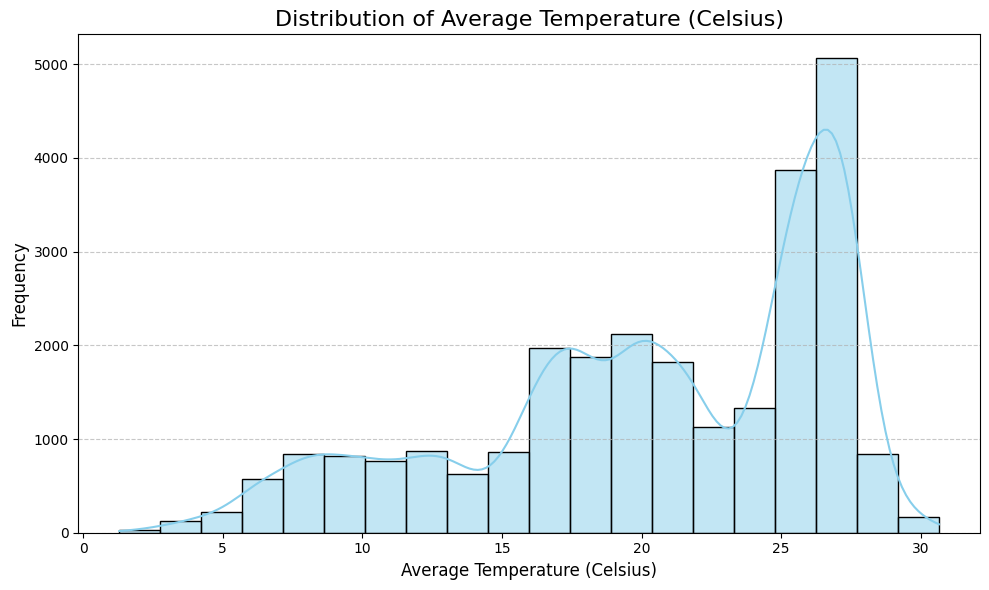

In [4]:
# --- Histogram: Distribution of Average Temperature ---
# This plot shows the frequency distribution of 'avg_temp_celsius', helping you understand its range and common values.
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_temp_celsius'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Temperature (Celsius)', fontsize=16)
plt.xlabel('Average Temperature (Celsius)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



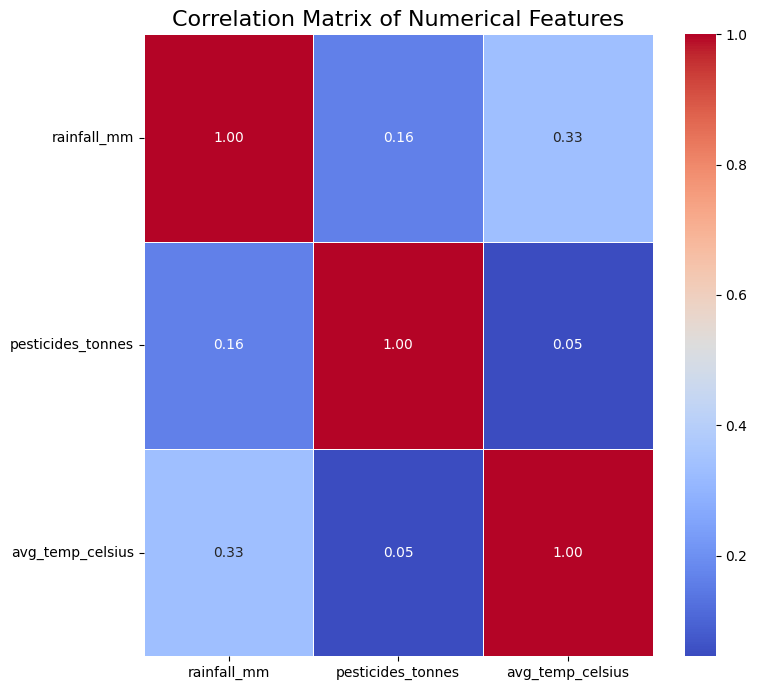

In [5]:
# --- Heatmap: Correlation Matrix of Numerical Features ---
# This heatmap displays the correlation coefficients between the numerical columns.
plt.figure(figsize=(8, 7))
numerical_cols = ['rainfall_mm', 'pesticides_tonnes', 'avg_temp_celsius']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

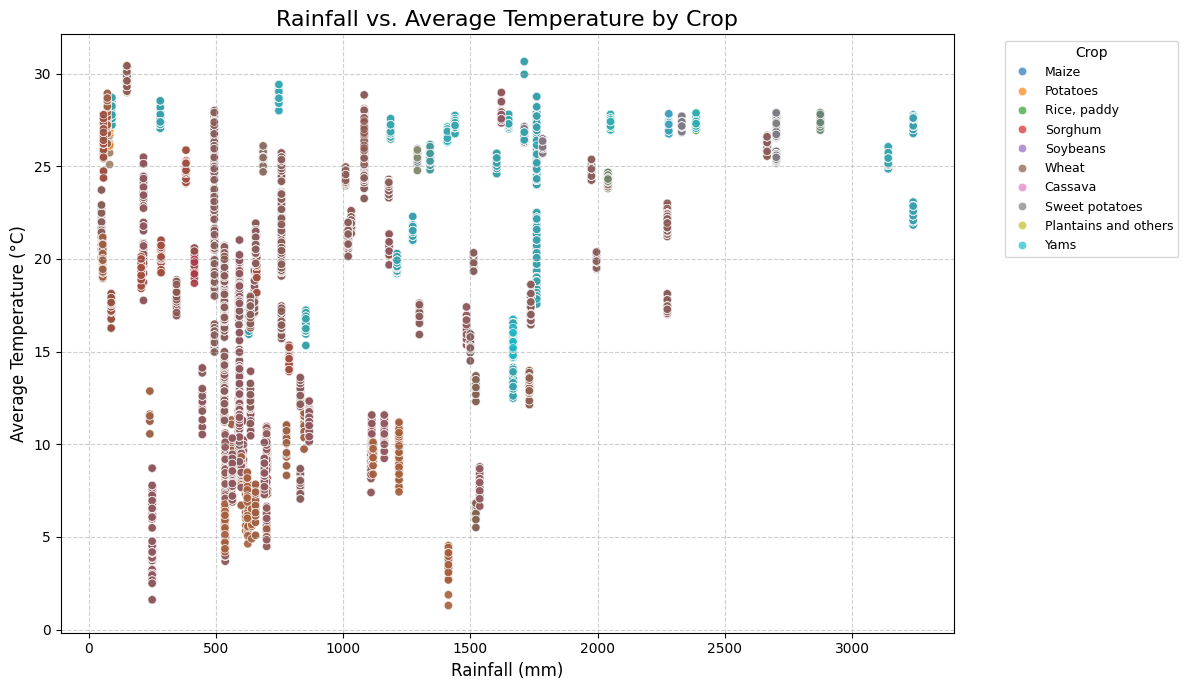

In [6]:
# Scatter Plot:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='rainfall_mm', y='avg_temp_celsius', hue='crop', alpha=0.7, palette='tab10')

plt.title('Rainfall vs. Average Temperature by Crop', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

In [7]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('yield_df.csv')
print("Sample data:\n", df.head())

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Define features and target
X = df.drop('crop', axis=1)
y = df['crop']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")

Sample data:
       area         crop  year  rainfall_mm  pesticides_tonnes  \
0  Albania        Maize  1990         1485              121.0   
1  Albania     Potatoes  1990         1485              121.0   
2  Albania  Rice, paddy  1990         1485              121.0   
3  Albania      Sorghum  1990         1485              121.0   
4  Albania     Soybeans  1990         1485              121.0   

   avg_temp_celsius  
0             16.37  
1             16.37  
2             16.37  
3             16.37  
4             16.37  

Linear Regression Evaluation:
MAE:  2.24
RMSE: 2.61
R²:   0.02

Decision Tree Regressor Evaluation:
MAE:  2.68
RMSE: 3.15
R²:   -0.43

Random Forest Regressor Evaluation:
MAE:  2.64
RMSE: 3.09
R²:   -0.38
